# Predicción de datos EEG contaminados con EOG

En este proyecto, se entrena una red neuronal para predecir datos EEG contaminados con EOG utilizando la técnica de eliminación de artefactos utilizando redes neuronales (Feed Forward). Se utilizarán 10 archivos numpy que contienen los datos EEG contaminados con EOG a diferentes niveles de decibelios.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l1, l2
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Se consideran 10 bases de datos con niveles de SNR variados entre -7 dB y 2 dB

In [2]:
filenames = [f"data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_{i}db.npy" for i in range(-7, 3)]

print(filenames)

['data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_-7db.npy', 'data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_-6db.npy', 'data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_-5db.npy', 'data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_-4db.npy', 'data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_-3db.npy', 'data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_-2db.npy', 'data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_-1db.npy', 'data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_0db.npy', 'data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_1db.npy', 'data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_2db.npy']


Los datos se contrastaran siempre con la misma base de datos 'x'  pero variando las bases de datos contaminadas en y, posteriormente los datos se dividen en grupos de entrenamiento y validacion de una proporcion 1:10.

El modelo que mejor resultado ha sido con la configuracion de 1 capa oculta (512, 256, 512), iterando por 300 epocas con batches de 32 de tamaño

In [3]:
x = np.load("data/EEG_contaminated_with_EOG/EEG_contaminated_with_EOG_0db.npy")
y = np.load('data/EEG_all_epochs.npy')

print(x.shape)
print(y.shape)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

(4514, 512)
(4514, 512)


## Arquitectura del modelo

In [4]:
# Create the model
model = Sequential()

# First Dense layer with L1 regularization
model.add(Dense(256, input_shape= (512,), activation='relu', ))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Second Dense layer with L2 regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(512))

model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

model.save('model.h5')

Epoch 1/100
226/226 [==============================] - 3s 5ms/step - loss: 51908.8633 - val_loss: 52817.7930
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 51447.2852 - val_loss: 51774.6172
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 50580.4922 - val_loss: 50497.9727
Epoch 4/100
226/226 [==============================] - 1s 3ms/step - loss: 49537.7500 - val_loss: 49291.5977
Epoch 5/100
226/226 [==============================] - 1s 3ms/step - loss: 48484.4141 - val_loss: 48026.2070
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 47482.8164 - val_loss: 46915.8984
Epoch 7/100
226/226 [==============================] - 1s 3ms/step - loss: 46589.9258 - val_loss: 45908.4727
Epoch 8/100
226/226 [==============================] - 1s 3ms/step - loss: 45759.5781 - val_loss: 44877.8945
Epoch 9/100
226/226 [==============================] - 1s 3ms/step - loss: 45052.9453 - val_loss: 43995.2852
Epoch 10/100
226/22

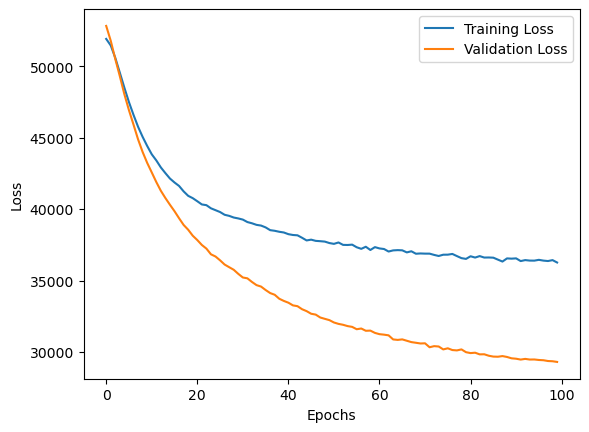

In [29]:
# Train the model
history = model.fit(x_train, y_train, epochs = 100, batch_size = 16, verbose = 1, validation_data = (x_val, y_val))

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Finalmente se evalua la red neuronal con el metodo del coeficiente de correlacion entre la base de datos 'x' y los diferentes 'y' que se testearon, sin embargo, los resultados obtenidos muestran un bajo rendimiento de este tipo de red neuronal, puesto que se testearon diferentes optimizadores, configuraciones y distintos hiperparamtros. Se observa un decenso especialmente alto en cuanto mas sucia esta la señal.

Finalmente se guardan los datos de evaluacion para todos los niveles de contaminacion que se crearon artificialmente en un archivo 'corrs.txt'

29/29 [==============================] - 0s 2ms/step


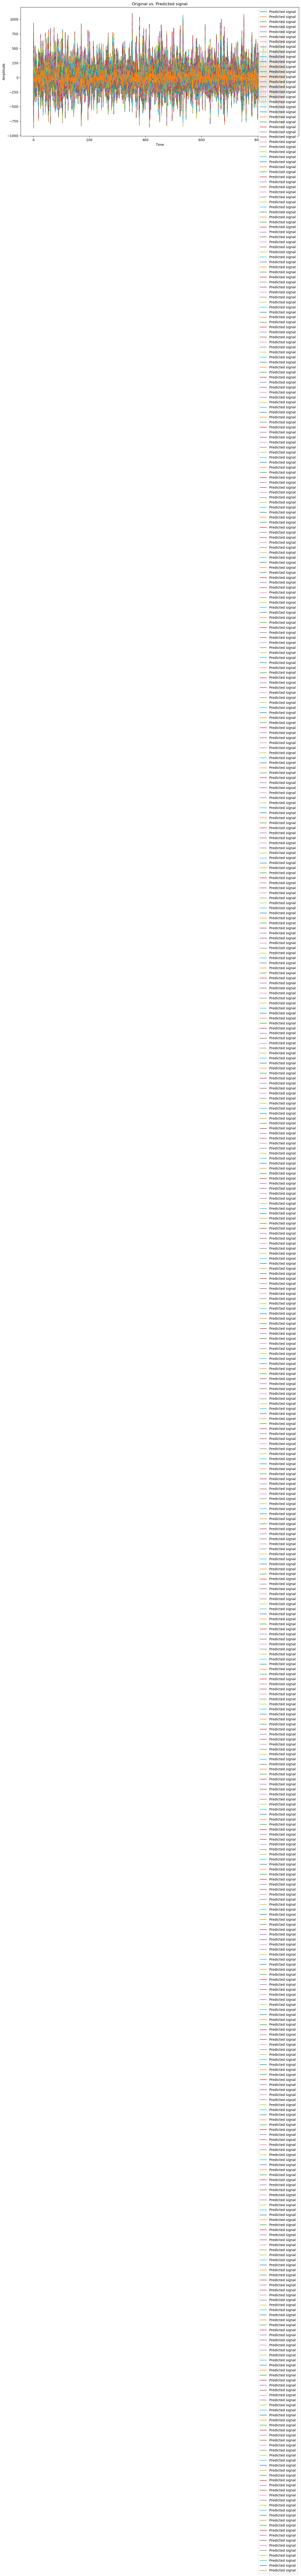

In [30]:
# Realizar las predicciones en el conjunto de validación
y_pred = model.predict(x_val)

# Create a time vector for plotting
t_val = np.linspace(0, 2*np.pi, len(y_val))

# Plot original and predicted signals
plt.figure(figsize=(15,7))
#plt.plot(t_val, y_val, label='Original signal')
plt.plot(y_pred, label='Predicted signal')
plt.title('Original vs. Predicted signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [31]:
#np.savetxt('corrs_sig3_B16.txt', corrs)

#TODO: Cambiar activacion sigmoide por activacion relu, actualizar resultados en tabla de conveniencia 
#TODO: Cambiar activacion sigmoide por tanH, actualizar resultados en tabla de conveniencia

# Prueba 1 (10/05): Cambio en las capas mas simples por activacion 'sigmoide' y reduccion en el tamaño del bash, pruebas en: 'corrs_sig1_B16.txt'
# Prueba 2 (10/05): Cambio en todas las capas en activacion 'sigmoide'

#TODO: Hacer analisis individual a las señales pero con el modelo entrenado con todas las señales